## Xarray-spatial local tools functions

### Sample data

In [1]:
import numpy as np
import xarray as xr

arr1 = xr.DataArray([[1, 1, 0, 0],
                     [np.nan, 1, 2, 2],
                     [4, 0, 0, 2],
                     [4, 0, 1, 1]], name='arr1')

arr2 = xr.DataArray([[0, 1, 1, 0],
                     [3, 3, 1, 2],
                     [np.nan, 0, 0, 2],
                     [3, 2, 1, 0]], name='arr2')

arr3 = xr.DataArray([[np.nan, 1, 0, 0],
                     [2, 0, 3, 3],
                     [0, 0, 3, 2],
                     [1, 1, np.nan, 0]], name='arr3')

raster_ds = xr.merge([arr1, arr2, arr3])

### Helping functions

In [2]:
import matplotlib.pyplot as plt

def plot_three_arrays(arr1, arr2, arr3):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

    title_list = ['arr1', 'arr2', 'result']
    
    for idx, arr in zip(range(0,3), [arr1, arr2, arr3]):
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                text = ax[idx].text(j, i, int(arr.data[i, j]) if str(arr.data[i, j]) != 'nan' else np.nan,
                               ha='center', va='center', color='black')

        ax[idx].imshow(arr.values, cmap='tab20c_r')
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        ax[idx].set_title(title_list[idx])

    plt.show()


def plot_four_arrays(arr1, arr2, arr3, arr4):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))

    title_list = ['arr1', 'arr2', 'arr3', 'result']
    
    for idx, arr in zip(range(0,4), [arr1, arr2, arr3, arr4]):
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                text = ax[idx].text(j, i, int(arr.data[i, j]) if str(arr.data[i, j]) != 'nan' else np.nan,
                               ha='center', va='center', color='black')

        ax[idx].imshow(arr.values, cmap='tab20c_r')
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        ax[idx].set_title(title_list[idx])

    plt.show()


def plot_five_arrays(arr1, arr2, arr3, arr4, arr5):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 10))

    title_list = ['arr_ref', 'arr1', 'arr2', 'arr3', 'result']
    
    for idx, arr in zip(range(0,5), [arr1, arr2, arr3, arr4, arr5]):
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                text = ax[idx].text(j, i, int(arr.data[i, j]) if str(arr.data[i, j]) != 'nan' else np.nan,
                               ha='center', va='center', color='black')

        ax[idx].imshow(arr.values, cmap='tab20c_r')
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        ax[idx].set_title(title_list[idx])

    plt.show()

### Combine

`xrspatial.local.combine` allow the combination of dimensions given a `xarray.Dataset` so that a unique output value is assigned to each unique combination.

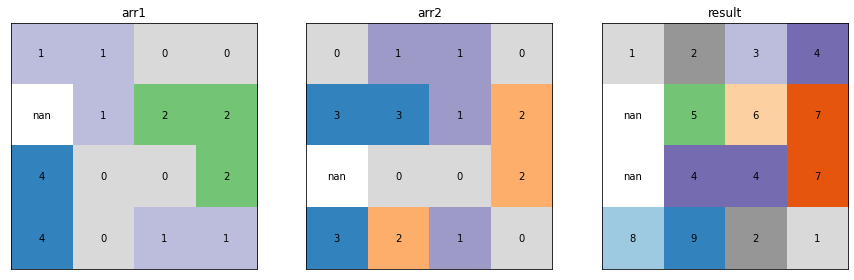

In [3]:
from xrspatial.local import combine

combined_arr = combine(raster_ds[['arr1', 'arr2']])

plot_three_arrays(raster_ds['arr1'], raster_ds['arr2'], combined_arr)

### Equal To Frequency

`xrspatial.local.equal_frequency` evaluates on a cell-by-cell basis the number of times the values in a set of rasters are equal to another raster.

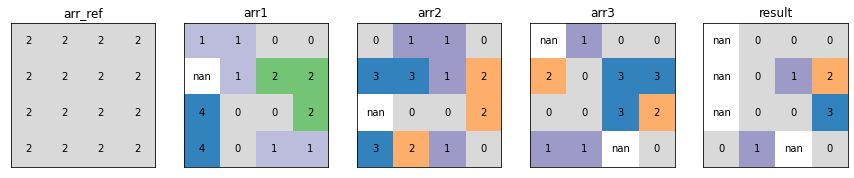

In [4]:
from xrspatial.local import equal_frequency

arr = xr.DataArray([[2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2]], name='arr')

input_ds = xr.merge([arr, raster_ds])

result_arr = equal_frequency(input_ds, 'arr')

plot_five_arrays(
    input_ds['arr'],
    input_ds['arr1'],
    input_ds['arr2'],
    input_ds['arr3'],
    result_arr,
)

### Greater Than Frequency

`xrspatial.local.greater_frequency` evaluates on a cell-by-cell basis the number of times a set of rasters is greater than another raster.

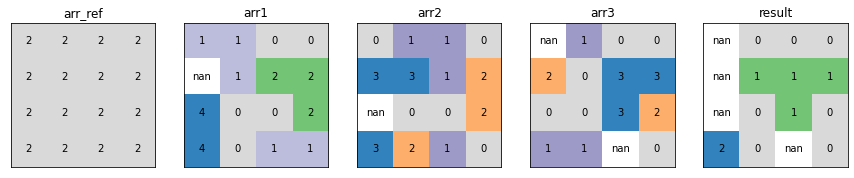

In [5]:
from xrspatial.local import greater_frequency

arr = xr.DataArray([[2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2],
                    [2, 2, 2, 2]], name='arr')

input_ds = xr.merge([arr, raster_ds])

result_arr = greater_frequency(input_ds, 'arr')

plot_five_arrays(
    input_ds['arr'],
    input_ds['arr1'],
    input_ds['arr2'],
    input_ds['arr3'],
    result_arr,
)

### Highest Position

`xrspatial.local.highest` determines on a cell-by-cell basis the position of the raster with the maximum value in a set of rasters.

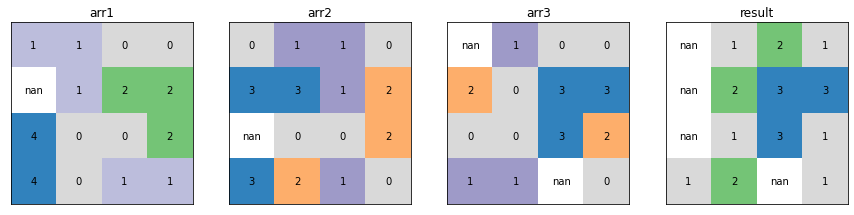

In [6]:
from xrspatial.local import highest

combined_arr = highest(raster_ds)

plot_four_arrays(
    raster_ds['arr1'],
    raster_ds['arr2'],
    raster_ds['arr3'],
    combined_arr,
)